In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

In [91]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [92]:
import warnings
# Ignoramos algunos warnings que se producen por invocar el modelo sin el nombre de las características
warnings.filterwarnings('ignore', category=UserWarning, message='.*X does not have valid feature names.*')

In [93]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [94]:
df = pd.read_csv("MuestraCredito5000V2.csv", sep=';')

In [95]:
df.head()

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,14327,1,1,MuyBajo,Bachiller,Si
1,111404,1,1,MuyBajo,Bachiller,Si
2,21128,1,1,MuyBajo,Bachiller,Si
3,15426,2,1,MuyBajo,Bachiller,Si
4,10351,1,1,MuyBajo,Bachiller,Si


In [96]:
df.isna().sum()

MontoCredito         0
IngresoNeto          0
CoefCreditoAvaluo    0
MontoCuota           0
GradoAcademico       0
BuenPagador          0
dtype: int64

In [97]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos en la columna '{column}': {unique_values}")

Valores únicos en la columna 'MontoCredito': [ 14327 111404  21128 ...  51366 129504  43331]
Valores únicos en la columna 'IngresoNeto': [1 2]
Valores únicos en la columna 'CoefCreditoAvaluo': [ 1 12 11  4  2 10  5  3  9  6  7  8]
Valores únicos en la columna 'MontoCuota': ['MuyBajo' 'Bajo' 'Medio' 'Alto']
Valores únicos en la columna 'GradoAcademico': ['Bachiller' 'Licenciatura']
Valores únicos en la columna 'BuenPagador': ['Si' 'No']


In [98]:
df.describe()

,MontoCredito,IngresoNeto,CoefCreditoAvaluo
count,5000.000000,5000.000000,5000.000000
mean,46778.123800,1.550800,10.340600
std,55394.605767,0.497462,2.890374
min,10000.000000,1.000000,1.000000
25%,14880.250000,1.000000,11.000000
50%,19969.500000,2.000000,11.000000
75%,47493.750000,2.000000,12.000000
max,299082.000000,2.000000,12.000000


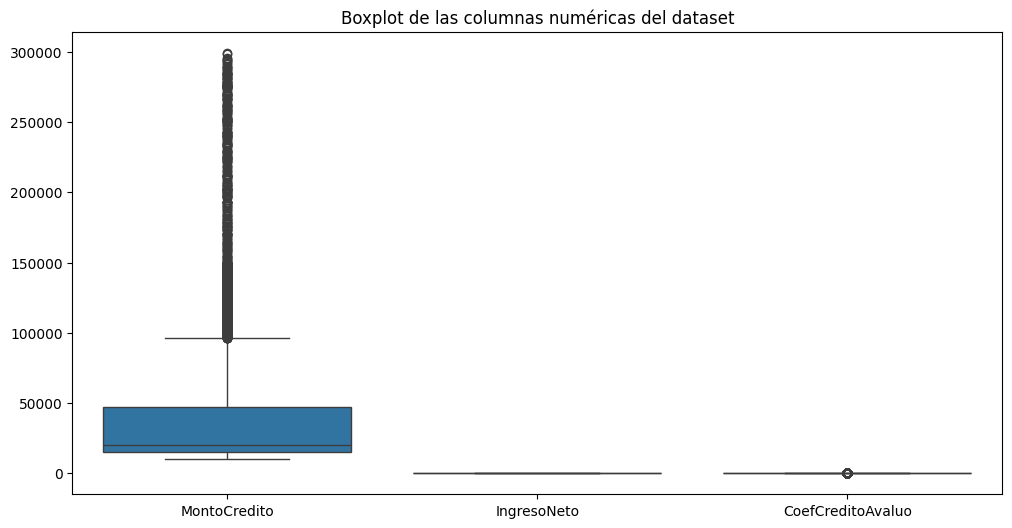

In [99]:
# Crear un boxplot para visualizar los atípicos en el dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MontoCredito', 'IngresoNeto', 'CoefCreditoAvaluo']])
plt.title('Boxplot de las columnas numéricas del dataset')
plt.show()

In [127]:
# Listar los 10 valores más altos en base a la variable MontoCredito
top_monto_credito = df.nlargest(10, 'MontoCredito')
print(top_monto_credito)

      MontoCredito  CoefCreditoAvaluo  MontoCuota  GradoAcademico  BuenPagador
416         299082                  4           1               1            1
631         298736                 12           1               0            1
638         295634                 12           1               0            1
2218        294735                 11           1               0            0
1096        293974                 12           2               0            1
2772        293807                 12           3               1            1
4975        293677                  4           3               1            0
1814        292264                 12           2               0            1
4713        291408                  1           2               0            0
3125        289968                 12           1               0            1


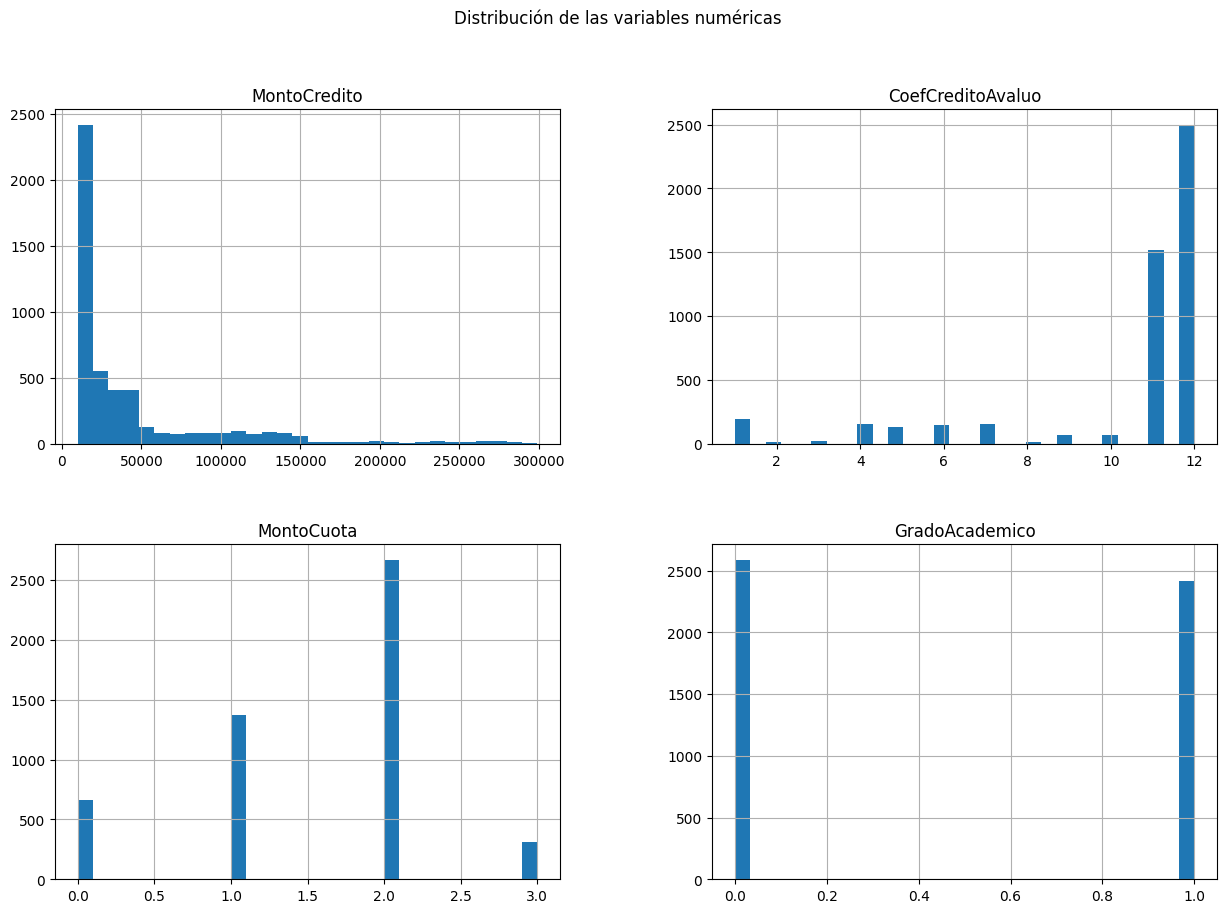

In [124]:

# Distribución de las variables numéricas
df[['MontoCredito', 'CoefCreditoAvaluo', 'MontoCuota', 'GradoAcademico']].hist(bins=30, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

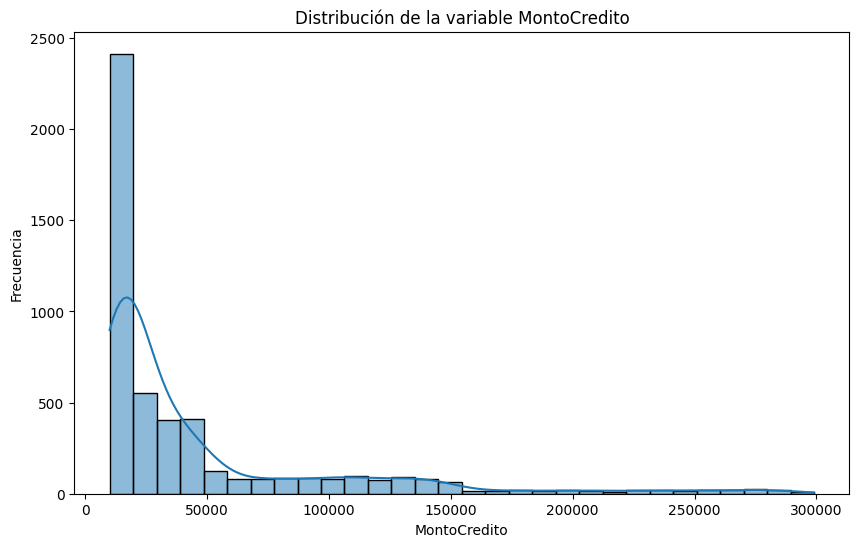

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MontoCredito'], bins=30, kde=True)
plt.title('Distribución de la variable MontoCredito')
plt.xlabel('MontoCredito')
plt.ylabel('Frecuencia')
plt.show()

In [101]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a las columnas no numéricas
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,14327,1,1,3,0,1
1,111404,1,1,3,0,1
2,21128,1,1,3,0,1
3,15426,2,1,3,0,1
4,10351,1,1,3,0,1


In [102]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos en la columna '{column}': {unique_values}")

Valores únicos en la columna 'MontoCredito': [ 14327 111404  21128 ...  51366 129504  43331]
Valores únicos en la columna 'IngresoNeto': [1 2]
Valores únicos en la columna 'CoefCreditoAvaluo': [ 1 12 11  4  2 10  5  3  9  6  7  8]
Valores únicos en la columna 'MontoCuota': [3 1 2 0]
Valores únicos en la columna 'GradoAcademico': [0 1]
Valores únicos en la columna 'BuenPagador': [1 0]


In [103]:
df.drop('IngresoNeto', axis=1, inplace=True)

In [104]:
train_set, val_set, test_set = train_val_test_split(df)


In [105]:
X_train, y_train = remove_labels(train_set, 'BuenPagador')
X_val, y_val = remove_labels(val_set, 'BuenPagador')
X_test, y_test = remove_labels(test_set, 'BuenPagador')

In [106]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [107]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [108]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.812


In [109]:
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.816


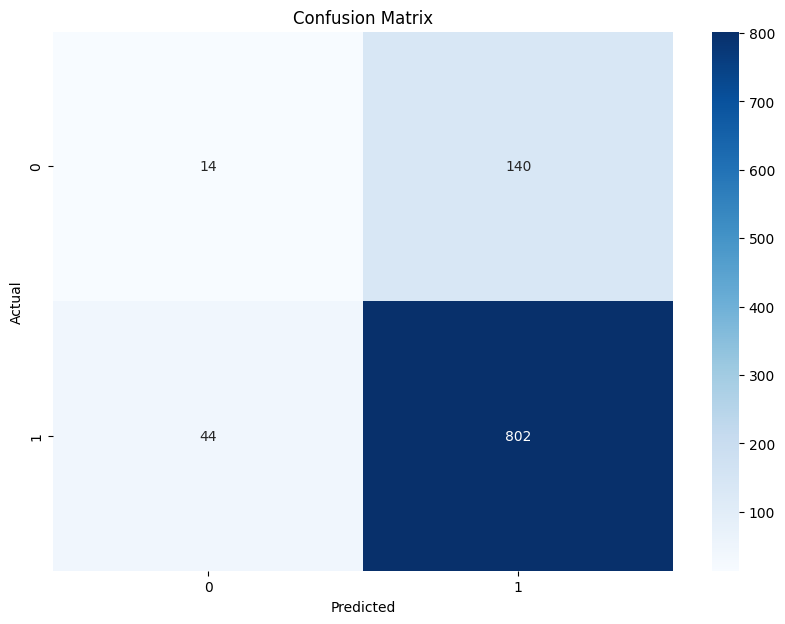

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predecir los valores de y para el conjunto de validación
y_pred_val = knn.predict(X_val)

# Crear la matriz de confusión
cm = confusion_matrix(y_val, y_pred_val)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

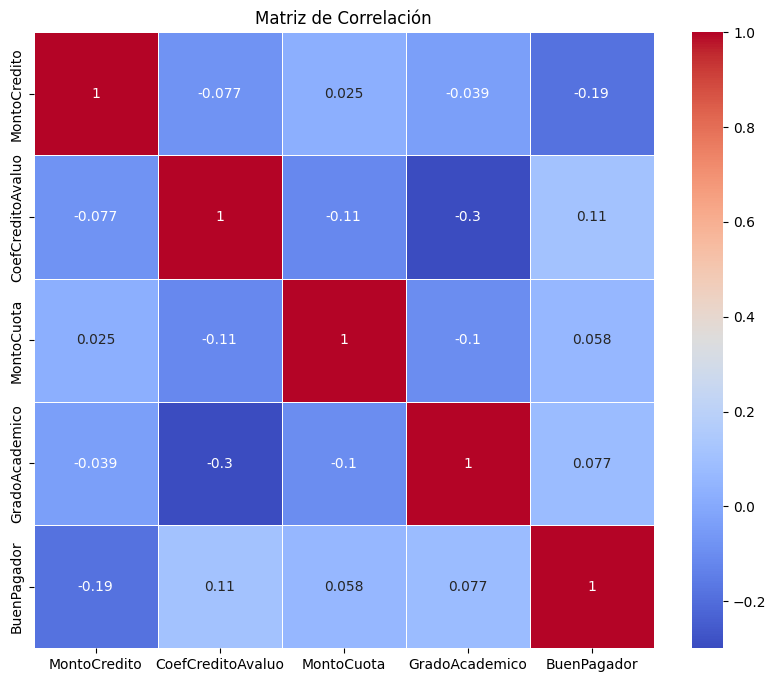

In [111]:
# Generar la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [121]:
df_to_val = pd.read_csv("CreditoNuevosIndividuos.csv", sep=';')

In [122]:
df_to_val.head()

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,12244,1,12,Bajo,Bachiller,NaN
1,287668,1,12,Bajo,Licenciatura,NaN
2,112932,1,12,Bajo,Licenciatura,NaN
3,133662,2,11,Medio,Licenciatura,NaN
4,10665,2,7,Medio,Licenciatura,NaN


In [114]:
df_to_val.drop('BuenPagador', axis=1, inplace=True)


In [115]:
df_to_val.drop('IngresoNeto', axis=1, inplace=True)

In [116]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a las columnas no numéricas
for column in df_to_val.select_dtypes(include=['object']).columns:
    df_to_val[column] = label_encoder.fit_transform(df_to_val[column])

df_to_val.head()

,MontoCredito,CoefCreditoAvaluo,MontoCuota,GradoAcademico
0,12244,12,1,0
1,287668,12,1,1
2,112932,12,1,1
3,133662,11,2,1
4,10665,7,2,1


In [117]:
y_pred_new = knn.predict(df_to_val)


In [118]:
df_to_val['BuenPagador'] = y_pred_new
df_to_val.head()

df

,MontoCredito,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
0,14327,1,3,0,1
1,111404,1,3,0,1
2,21128,1,3,0,1
3,15426,1,3,0,1
4,10351,1,3,0,1
...,...,...,...,...,...
4995,102646,12,0,1,0
4996,95782,12,0,1,0
4997,51366,12,0,1,0
4998,129504,12,0,1,0


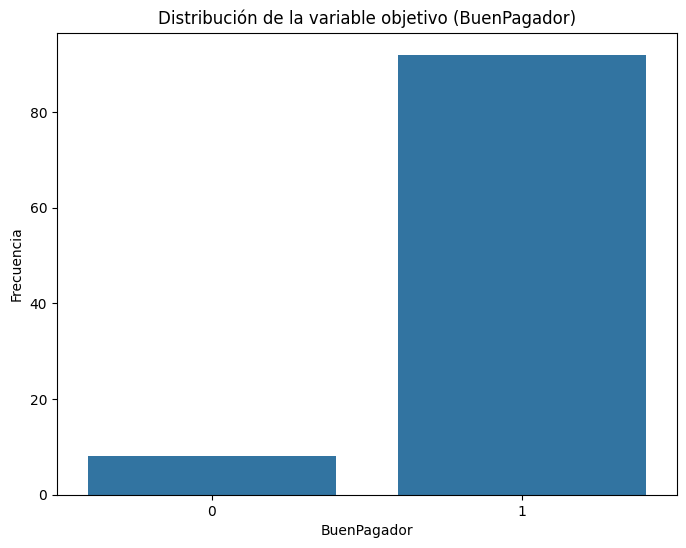

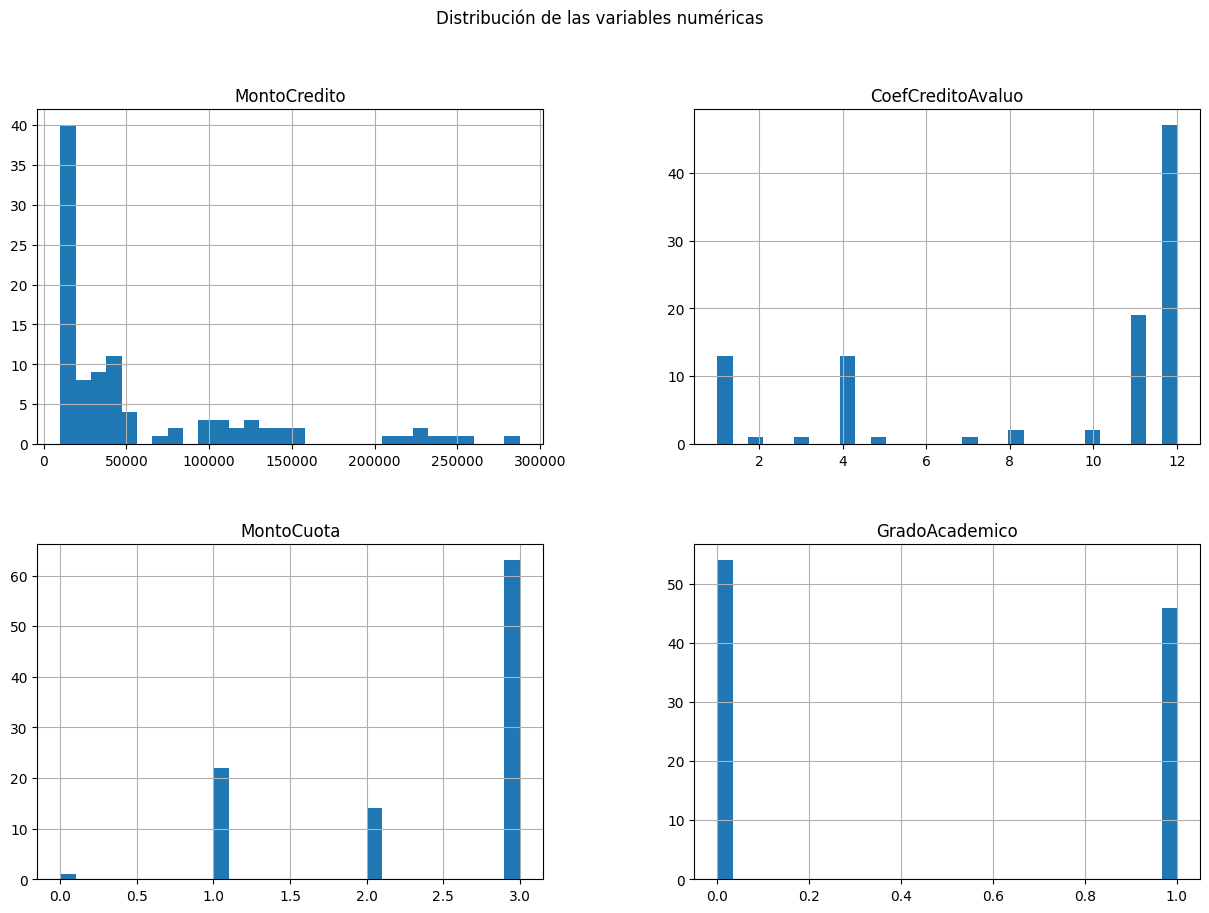

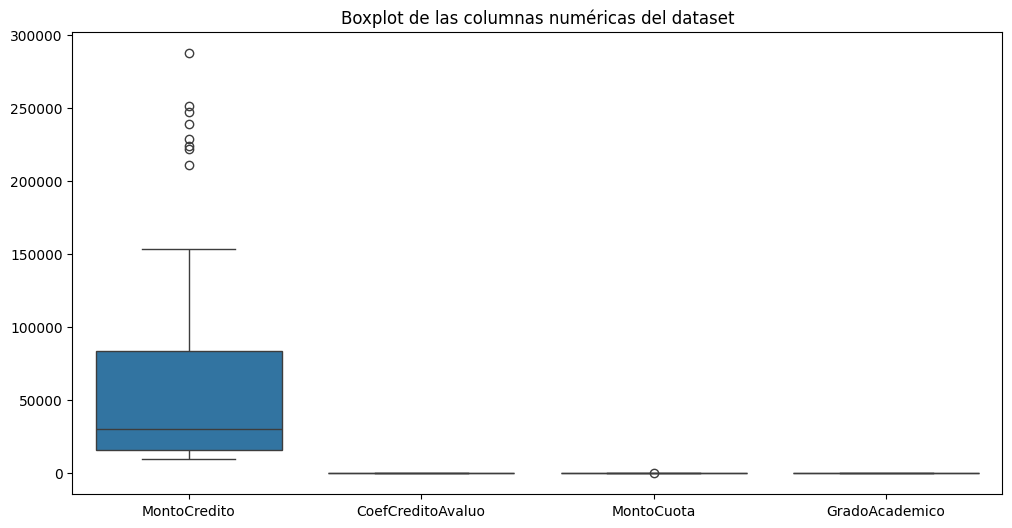

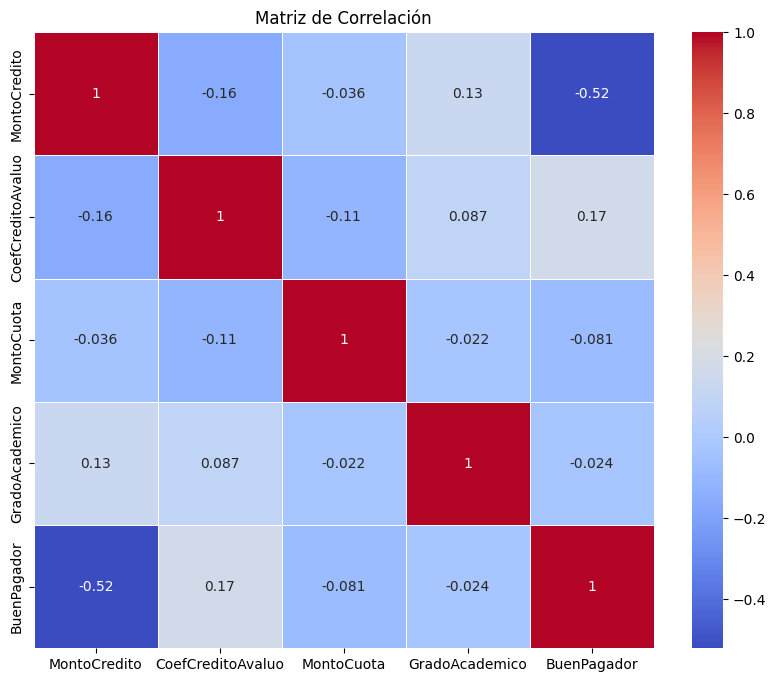

In [119]:
# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='BuenPagador', data=df_to_val)
plt.title('Distribución de la variable objetivo (BuenPagador)')
plt.xlabel('BuenPagador')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de las variables numéricas
df_to_val[['MontoCredito', 'CoefCreditoAvaluo', 'MontoCuota', 'GradoAcademico']].hist(bins=30, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

# Boxplots de las variables numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_to_val[['MontoCredito', 'CoefCreditoAvaluo', 'MontoCuota', 'GradoAcademico']])
plt.title('Boxplot de las columnas numéricas del dataset')
plt.show()

# Matriz de correlación
correlation_matrix = df_to_val.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()